# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [57]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from timeit import default_timer as timer

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = 'image_predictions.tsv'
with open(os.path.join(file_name) ,'wb') as file:
    file.write(response.content)

In [4]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#create array of twitter ids from df_archive
tweet_ids = df_archive['tweet_id']
tweet_ids.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [6]:
#Twitter Credentials
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""



In [7]:
#Twitter Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [8]:
#List of dictionaries to build and convert dataframe
#I could not access the tweet_ids via the twitter api because it said I needed a higher access level. Will use the provided JSON file instead

# found_tweets = []
# missing_tweets = []
# for tweet_id in tweet_ids:
#     try:
#         found_tweets.append(api.get_status(tweet_id))
#         print(f"success {tweet_id}")
#     except tweepy.TweepError as e:
#         missing_tweets.append(tweet_id)
#         print(f"error {e} ID {tweet_id}")
        

        

In [9]:
# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
#importing JSON file into a and saving the columns needed into a new dataframe
df_json = pd.read_json('tweet_json.txt', lines=True)
df_json = pd.DataFrame(df_json)
df_json_copy = df_json[['id', 'retweet_count', 'favorite_count']]
df_json_copy = pd.DataFrame(df_json_copy)
df_json_copy.head(), df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


(                   id  retweet_count  favorite_count
 0  892420643555336193           8853           39467
 1  892177421306343426           6514           33819
 2  891815181378084864           4328           25461
 3  891689557279858688           8964           42908
 4  891327558926688256           9774           41048, None)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
#Saving twitter_archive dataframe to excel for easier accessing.
file_name = 'twitter_archive.xlsx'
df_archive.to_excel(file_name)


In [12]:
#Saving df_image_predictions dataframe to excel for easier accessing.
file_name = 'image_predictions.xlsx'
df_image_predictions.to_excel(file_name)

In [13]:
#Saving df_json dataframe to excel for easier accessing.
file_name = 'JSON.xlsx'
df_json.to_excel(file_name)

In [14]:
#Visual inspection of dataframe
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
#Programatically checking for null values
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#Programatically checking for weird jumps in means
df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [17]:
#Programatically checking for duplicates
df_archive.duplicated('tweet_id').sum()

0

In [18]:
#Visual inspection of dataframe
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
#Checking for null values
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#Programatically checking for weird jumps in means
df_image_predictions[['p1_conf','p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [22]:
#Programatically checking for duplicates
df_image_predictions.duplicated().sum()

0

In [23]:
#Checking for null values
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [24]:
df_json[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues
1. Missing expanded URLs in df_archive table

2. timestamp and retweeted_status_timestamp should be datetime datatype in the df_archive table

3. retweeted_status_id, retweeted_status_user_id should be int datatype in the df_archive table (We won't be using these so no need to clean)

4. Non valid dog types in the p1, p2, and p3 columns df_image_predictions table like "hen", "mud-turtle", "desk". These are marked p1_dog = False

5. The geo, contributors, coordinates, contributors, columns of df_json table are empty

6. These columns should be int datatypes in_reply_to_status_id,  in_reply_to_user_id, quoted_status_id, in df_json table (We won't be using these so no need to clean)

7. These columns should be string datatypes in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str in df_json table (We won't be using these so no need to clean)

8. df_archive, df_image_predictions, and df_json should be in one table

### Tidiness issues
1. The doggo, floofer, pupper, and puppo fields should not be separate fields in df_archive

2. Retweets and replies are not needed in df_archive table

3. doggo, pupper, puppo, and floofer have "None" instead of being empty

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_json_clean = df_json.copy()

### Issue #1:

#### Define: Remove expanded_urls column in df_archive table

#### Code

In [26]:
df_archive_clean.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [27]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 294.6+ KB


### Issue #2:

#### Update timestamp and retweeted_status_timestamp to datetime datatype in the df_archive table

#### Code

In [28]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_archive_clean['retweeted_status_timestamp'])

#### Test

In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(7)
memory u

### Issue #3:

#### Define Delete rows with non valid dog types marked p1_dog = False in the df_image_predictions_clean table

#### Code

In [30]:
df_image_predictions_clean.drop(df_image_predictions_clean[df_image_predictions_clean['p1_dog'] == False].index, inplace=True)

#### Test

In [31]:
df_image_predictions_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #4:

#### Define Delete geo, contributors, coordinates, contributors, columns of df_json_clean table 

#### Code

In [32]:
df_json_clean.drop(['geo', 'coordinates', 'contributors'], axis=1, inplace=True)

#### Test

In [33]:
list(df_json_clean)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

### Issue #5:

#### Convert tweet_id columns in df_archive and df_image_predictions to string

#### Code

In [34]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)
df_json_clean['id'] = df_json_clean['id'].astype(str)


#### Test

In [35]:
df_archive_clean.info(), df_image_predictions_clean.info(), df_json_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory 

(None, None, None)

### Issue #6:

#### Change column name id to tweet_id in df_json_clean

#### Code

In [36]:
df_json_clean = df_json_clean.rename(columns = {'id':'tweet_id'})

#### Test

In [37]:
df_json_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
place                            

### Issue #7:

#### Define Merge df_archive, df_image_predictions, and df_json should be into one table based on the tweet_id

#### Code

In [38]:
df_merged = df_archive_clean.merge(df_image_predictions_clean, how='inner', on='tweet_id')
df_merged = df_merged.merge(df_json_clean, how='inner', on='tweet_id')

#Remove 'None' from columns and replace with NaN
df_merged = df_merged.replace('None', np.nan)

#### Test

In [39]:
#I could only get "doggo" to merge correctly so I needed to visually inspect the the df_merged dataframe to figure out why. The columns contained "none" and so it was only merging the doggo column
file_name = 'doggo_Before_Merge.xlsx'
df_merged.to_excel(file_name)


In [40]:
#Actual Test
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 1530
Data columns (total 54 columns):
tweet_id                         1531 non-null object
in_reply_to_status_id_x          14 non-null float64
in_reply_to_user_id_x            14 non-null float64
timestamp                        1531 non-null datetime64[ns]
source_x                         1531 non-null object
text                             1531 non-null object
retweeted_status_id              54 non-null float64
retweeted_status_user_id         54 non-null float64
retweeted_status_timestamp       54 non-null datetime64[ns]
rating_numerator                 1531 non-null int64
rating_denominator               1531 non-null int64
name                             1152 non-null object
doggo                            63 non-null object
floofer                          8 non-null object
pupper                           158 non-null object
puppo                            20 non-null object
jpg_url                      

### Issue #8:

#### The doggo, floofer, pupper, and puppo fields should not be separate fields in df_archive

#### Code

In [41]:
#Create new doggo_type column
df_merged['doggo_type'] = None

#Loop through each column and add to doggo_type column if value exists (WOOF! This took forever to figure out)
for index, row in df_merged.iterrows():
    if pd.notna(row['doggo']):
        df_merged.at[index, 'doggo_type'] = row['doggo']
    elif pd.notna(row['floofer']):
        df_merged.at[index, 'doggo_type'] = row['floofer']
    elif pd.notna(row['pupper']):
        df_merged.at[index, 'doggo_type'] = row['pupper']
    elif pd.notna(row['puppo']):
        df_merged.at[index, 'doggo_type'] = row['puppo']
        
#Drop old columns
df_merged.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [42]:
df_merged['doggo_type'].value_counts()


pupper     148
doggo       63
puppo       19
floofer      7
Name: doggo_type, dtype: int64

In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 1530
Data columns (total 51 columns):
tweet_id                         1531 non-null object
in_reply_to_status_id_x          14 non-null float64
in_reply_to_user_id_x            14 non-null float64
timestamp                        1531 non-null datetime64[ns]
source_x                         1531 non-null object
text                             1531 non-null object
retweeted_status_id              54 non-null float64
retweeted_status_user_id         54 non-null float64
retweeted_status_timestamp       54 non-null datetime64[ns]
rating_numerator                 1531 non-null int64
rating_denominator               1531 non-null int64
name                             1152 non-null object
jpg_url                          1531 non-null object
img_num                          1531 non-null int64
p1                               1531 non-null object
p1_conf                          1531 non-null float64
p1_dog               

### Issue #7:

#### Define Remove Retweets and replies from df-merged

#### Code

In [44]:
df_merged.drop(df_merged[df_merged['retweeted_status_id'].notnull()].index, inplace=True)
df_merged.drop(df_merged[df_merged['in_reply_to_status_id_str'].notnull()].index, inplace=True)

#### Test

In [45]:
df_merged.info()
#used to have 1530 entries, now has 1463

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1530
Data columns (total 51 columns):
tweet_id                         1463 non-null object
in_reply_to_status_id_x          0 non-null float64
in_reply_to_user_id_x            0 non-null float64
timestamp                        1463 non-null datetime64[ns]
source_x                         1463 non-null object
text                             1463 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null datetime64[ns]
rating_numerator                 1463 non-null int64
rating_denominator               1463 non-null int64
name                             1114 non-null object
jpg_url                          1463 non-null object
img_num                          1463 non-null int64
p1                               1463 non-null object
p1_conf                          1463 non-null float64
p1_dog                    

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
file_name = 'twitter_archive_master.csv'
df_merged.to_csv(file_name)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
#import master file into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 52 columns):
Unnamed: 0                       1463 non-null int64
tweet_id                         1463 non-null int64
in_reply_to_status_id_x          0 non-null float64
in_reply_to_user_id_x            0 non-null float64
timestamp                        1463 non-null object
source_x                         1463 non-null object
text                             1463 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null float64
rating_numerator                 1463 non-null int64
rating_denominator               1463 non-null int64
name                             1114 non-null object
jpg_url                          1463 non-null object
img_num                          1463 non-null int64
p1                               1463 non-null object
p1_conf                          1463 non-nu

In [48]:
df_master.groupby('doggo_type').mean()['retweet_count']

doggo_type
doggo      7364.894737
floofer    4968.714286
pupper     2557.027778
puppo      6551.473684
Name: retweet_count, dtype: float64

In [49]:
df_master.groupby('p1').mean()['retweet_count']

p1
Afghan_hound                      5976.000000
Airedale                          1393.750000
American_Staffordshire_terrier    2204.923077
Appenzeller                       1458.000000
Australian_terrier                3078.500000
Bedlington_terrier                2863.800000
Bernese_mountain_dog              1604.100000
Blenheim_spaniel                  2583.300000
Border_collie                     2207.750000
Border_terrier                    3377.142857
Boston_bull                       1712.666667
Brabancon_griffon                  287.666667
Brittany_spaniel                  1496.714286
Cardigan                          4540.588235
Chesapeake_Bay_retriever          2730.130435
Chihuahua                         2815.512821
Dandie_Dinmont                    1040.333333
Doberman                          1804.125000
English_setter                    1501.857143
English_springer                  5973.555556
EntleBucher                        706.000000
Eskimo_dog                     

In [50]:
df_master.groupby('doggo_type')['rating_numerator', 'rating_denominator'].mean()['rating_numerator']/df_master.groupby('doggo_type')['rating_numerator', 'rating_denominator'].mean()['rating_denominator'] * 100


doggo_type
doggo      119.122807
floofer    120.000000
pupper     110.625000
puppo      120.000000
dtype: float64

In [51]:
df_master.groupby('p1').mean()['retweet_count'].sort_values(ascending=False)

p1
standard_poodle                6631.857143
Afghan_hound                   5976.000000
English_springer               5973.555556
giant_schnauzer                5161.500000
Saluki                         5133.750000
Eskimo_dog                     4768.888889
Great_Pyrenees                 4732.285714
Lakeland_terrier               4701.533333
French_bulldog                 4683.923077
Samoyed                        4623.050000
Cardigan                       4540.588235
flat-coated_retriever          4520.250000
Irish_water_spaniel            4500.666667
Tibetan_mastiff                4193.000000
black-and-tan_coonhound        4164.500000
Labrador_retriever             3884.138298
Mexican_hairless               3865.250000
Leonberg                       3863.666667
cocker_spaniel                 3724.481481
golden_retriever               3658.576642
Norwegian_elkhound             3446.285714
Border_terrier                 3377.142857
Irish_setter                   3374.000000
basset  

In [53]:
df_master.groupby('p1').count()['tweet_id'].sort_values(ascending=False)

p1
golden_retriever               137
Labrador_retriever              94
Pembroke                        88
Chihuahua                       78
pug                             54
chow                            41
Samoyed                         40
Pomeranian                      38
toy_poodle                      37
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              21
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       19
Maltese_dog                     18
Shetland_sheepdog               18
Eskimo_dog                      18
beagle                          17
Cardigan                        17
Shih-Tzu                        17
Rottweiler                      16
Italian_greyhound               16
Lakeland_terrier                15
kuvasz                          15
West_Highland_white_terrier     14
Great_Pyrenees   

### Insights:
1. The dog breed that has the highest average number of retweets is the Standard Poodle

2. Floofers and Puppos are tied for the most highly rated with 120%

3. Golden Retrievers had the most submissions for ratings than any other breed

### Visualization

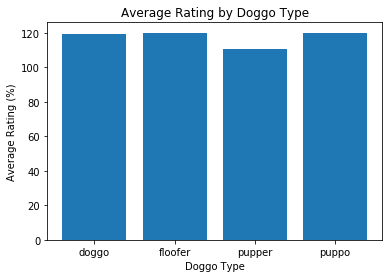

In [58]:
# Calculate the average rating per 'doggo_type'
average_rating = df_master.groupby('doggo_type')['rating_numerator', 'rating_denominator'].mean()
average_rating_percent = average_rating['rating_numerator'] / average_rating['rating_denominator'] * 100

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(average_rating_percent.index, average_rating_percent.values)

# Customize the plot
ax.set_title('Average Rating by Doggo Type')
ax.set_xlabel('Doggo Type')
ax.set_ylabel('Average Rating (%)')

# Display the plot
plt.show()


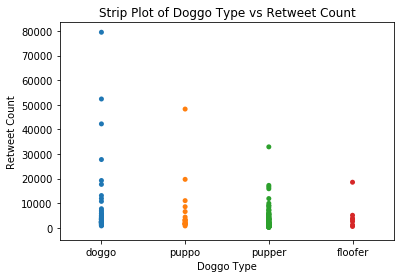

In [61]:
#Strip plot showing the relationship between doggo_type and retweet count
# Create a strip plot
sns.stripplot(x='doggo_type', y='retweet_count', data=df_master)

# Customize the plot
plt.title('Strip Plot of Doggo Type vs Retweet Count')
plt.xlabel('Doggo Type')
plt.ylabel('Retweet Count')

# Display the plot
plt.show()


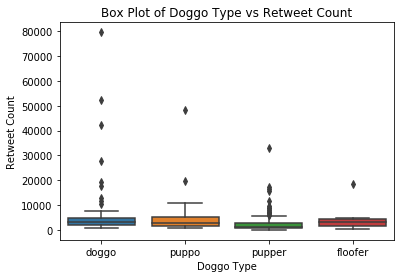

In [62]:
#Box plot showing the relationship between doggo_type and retweet count
# Create a box plot
sns.boxplot(x='doggo_type', y='retweet_count', data=df_master)

# Customize the plot
plt.title('Box Plot of Doggo Type vs Retweet Count')
plt.xlabel('Doggo Type')
plt.ylabel('Retweet Count')

# Display the plot
plt.show()
